In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:

config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [3]:
detector = Predictor(config)

/mlcv2/WorkingSpace/Personal/hamh/miniconda3/envs/VietOCR/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/mlcv2/WorkingSpace/Personal/hamh/Ha/Methods/vietocr/vietocr/tool/predictor.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed duri

'Hạnh'

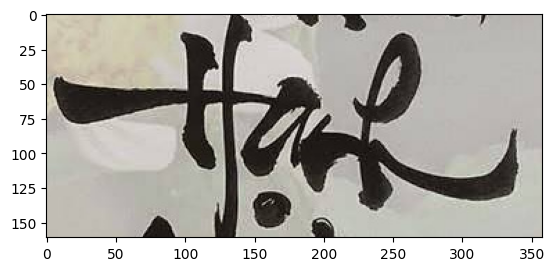

In [4]:
img = '/mlcv2/WorkingSpace/Personal/hamh/Ha/Data/Vicalligraphy/ViCalligraphy/images/1112.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [7]:
import os
def get_file_label(inputPath, gtFile):
    """
    Create LMDB dataset for training and evaluation.
    ARGS:
        inputPath  : input folder path where starts imagePath
        outputPath : LMDB output path
        gtFile     : list of image path and label
        checkValid : if true, check the validity of every image
    """
    list_image_path, list_label_path = [], []
    with open(gtFile, 'r', encoding='utf-8') as f:
        data = f.readlines()
    for i, line in enumerate(data):
        imagePath, label = line.strip().split(maxsplit=1)
        imagePath = os.path.join(inputPath, imagePath)
        list_image_path.append(imagePath)
        list_label_path.append(label)
    return list_image_path, list_label_path
    
files, labels = get_file_label('/mlcv2/WorkingSpace/Personal/hamh/Ha/Data/Vicalligraphy/ViCalligraphy/test_folder_images',
               '/mlcv2/WorkingSpace/Personal/hamh/Ha/Data/Vicalligraphy/ViCalligraphy/test_folder_images/test_vietocr.txt')
print(len(files), len(labels))


3108 3108


In [12]:
#Lưu kết quả tập test
for image_file in files:
    img = Image.open(image_file)
    res = detector.predict(img)
    dest_path = '/mlcv2/WorkingSpace/Personal/hamh/Ha/Methods/DemoSTR/STR_prediction_results/STR/VietOCR.txt'

    with open(dest_path, encoding='utf-8', mode='a') as file:
        file.write(f"{image_file}\t{res}\n")